<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/dataAnalyse01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
dataset=pd.read_csv('Data_2023.csv')
print(dataset)
print(type(dataset))

for index, row in dataset.iterrows():
    for column in dataset.columns[1:]:
        if row[column] < 0:
            dataset.at[index, column] = 0
print(dataset)

                   Time  Scan No.  PV Module Voltage (V)  PV Module Temp (°C)  \
0      2023/10/01 00:10       192              10.937142            27.191079   
1      2023/10/01 00:20       193              10.863576            27.190635   
2      2023/10/01 00:30       194              10.772687            27.244852   
3      2023/10/01 00:40       195              10.712664            27.259414   
4      2023/10/01 00:50       196              10.712393            27.310182   
...                 ...       ...                    ...                  ...   
10527  2023/12/31 23:12       349              10.263824            16.027487   
10528  2023/12/31 23:22       350              10.286724            16.145074   
10529  2023/12/31 23:32       351              10.289653            16.666493   
10530  2023/12/31 23:42       352              10.313808            16.650916   
10531  2023/12/31 23:52       353              10.289519            16.865915   

       Ambient Temp (°C)  S

In [85]:
#ek din ka day time
from datetime import datetime
dataset["Time"]=pd.to_datetime(dataset["Time"])
start_time = pd.to_datetime("05:00", format="%H:%M").time()
end_time = pd.to_datetime("18:00", format="%H:%M").time()
target_date = pd.to_datetime("2023-10-01").date()
new_dataset = dataset[(dataset['Time'].dt.time >= start_time) & (dataset['Time'].dt.time <= end_time) & (dataset["Time"].dt.date==target_date)]
# new_dataset=new_dataset[:,]
new_dataset=new_dataset.iloc[:,0:9].values
print(new_dataset)


[[Timestamp('2023-10-01 05:00:00') 221 11.0277646 27.0734978 26.3702765
  0.0 12.5716656 0.0 0.0]
 [Timestamp('2023-10-01 05:10:00') 222 12.3572681 26.9997312 26.3305798
  0.0 12.56969 0.0 0.0]
 [Timestamp('2023-10-01 05:20:00') 223 12.5209209 26.9861785 26.3235569
  0.0 12.5688767 0.0 0.0]
 [Timestamp('2023-10-01 05:30:00') 224 12.5679874 26.9991944 26.2986259
  0.0 12.5689667 0.00122246212 0.015363888521137289]
 [Timestamp('2023-10-01 05:40:00') 225 12.6289548 27.2100163 26.3801367
  0.0 12.5715907 0.0205762347 0.2598563379804915]
 [Timestamp('2023-10-01 05:50:00') 226 31.9924283 27.3132979 26.445881
  4.86257116 12.5743154 0.00884979659 0.2831264828751595]
 [Timestamp('2023-10-01 06:00:00') 227 30.6509793 27.3477425 26.4726363
  2.68403957 12.5729028 0.0127988132 0.3922961584577667]
 [Timestamp('2023-10-01 06:10:00') 228 33.0534188 27.5012558 26.551316
  0.0 12.5761535 0.011811559 0.3904124063079091]
 [Timestamp('2023-10-01 06:20:00') 229 33.6356887 27.4961802 26.5249206
  21.206776

In [73]:
print("Shape:", new_dataset.shape)
print("Data Type:", new_dataset.dtype)

Shape: (79, 10)
Data Type: object


# plot of time and PV module voltage

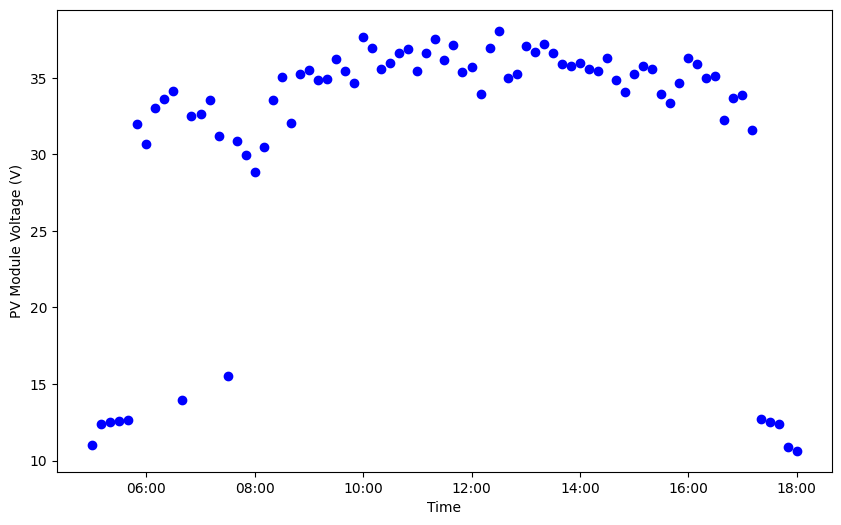

In [76]:
import matplotlib.dates as mdates
X=new_dataset[:,0]
y=new_dataset[:,2]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("PV Module Voltage (V)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

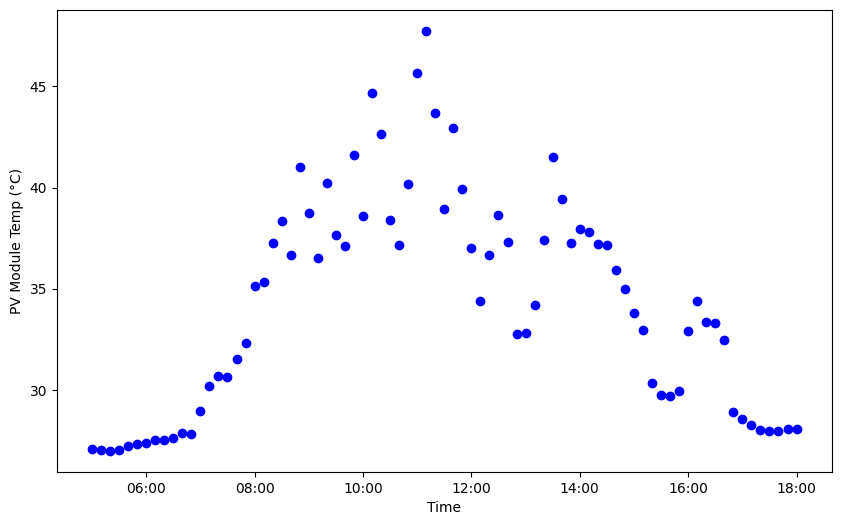

In [77]:
X=new_dataset[:,0]
y=new_dataset[:,3]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("PV Module Temp (°C)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

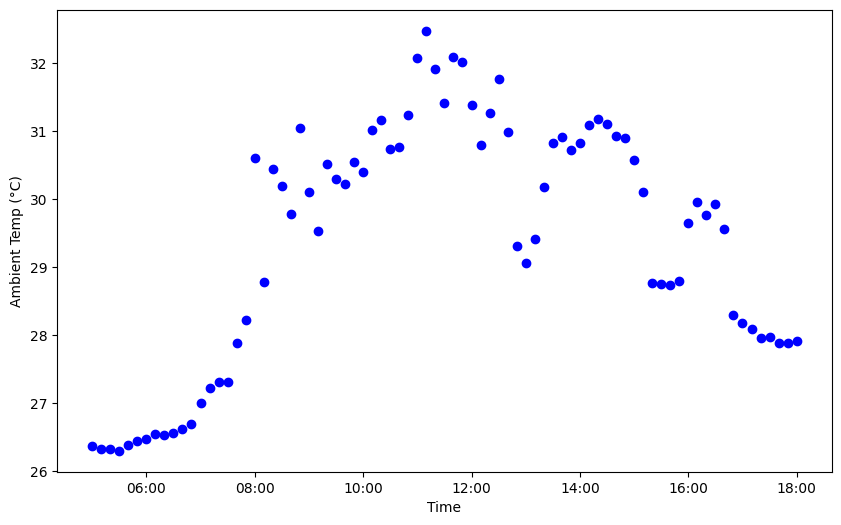

In [78]:
X=new_dataset[:,0]
y=new_dataset[:,4]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("Ambient Temp (°C)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

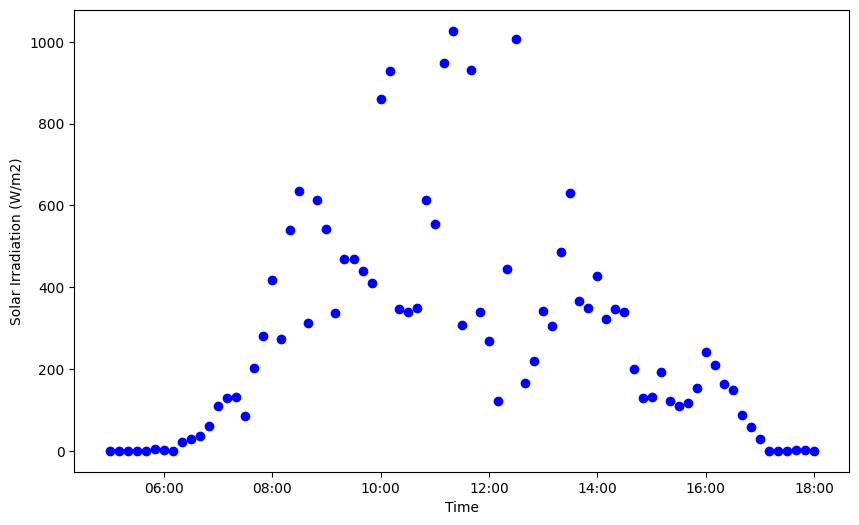

In [80]:
X=new_dataset[:,0]
y=new_dataset[:,5]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("Solar Irradiation (W/m2)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

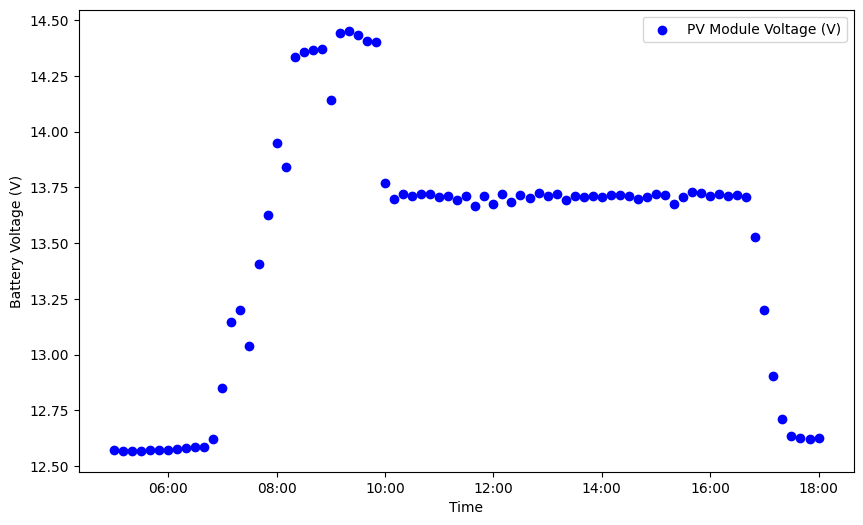

In [103]:
X=new_dataset[:,0]
y=new_dataset[:,6]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("Battery Voltage (V)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

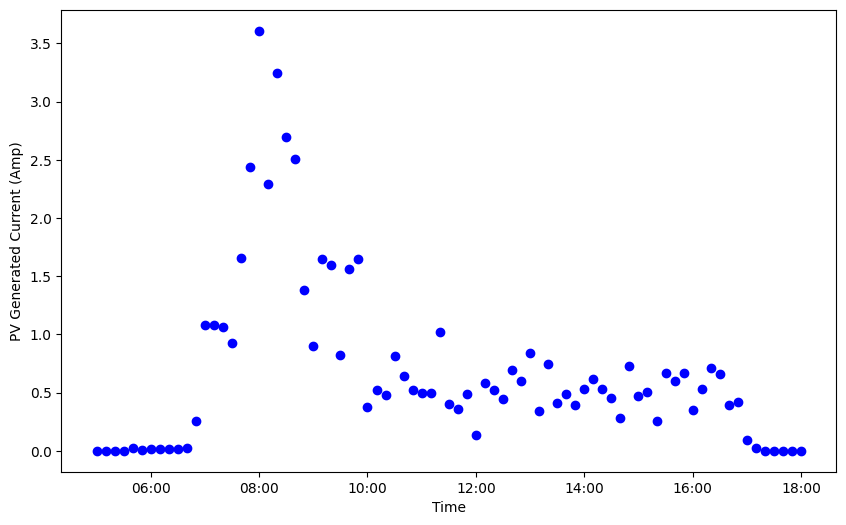

In [82]:
X=new_dataset[:,0]
y=new_dataset[:,7]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("PV Generated Current (Amp)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

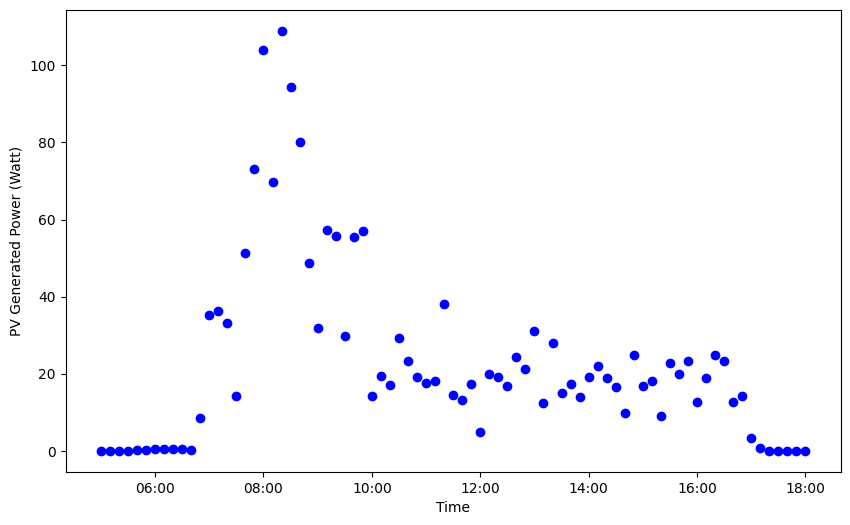

In [83]:
X=new_dataset[:,0]
y=new_dataset[:,8]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', color='blue')
plt.ylabel("PV Generated Power (Watt)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

##Random Color Generator Function

In [99]:
import random

def random_color():
    """Generate a random color in RGB format."""
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return (r/256, g/256, b/256)

In [100]:
random_color()

(0.12890625, 0.52734375, 0.21875)

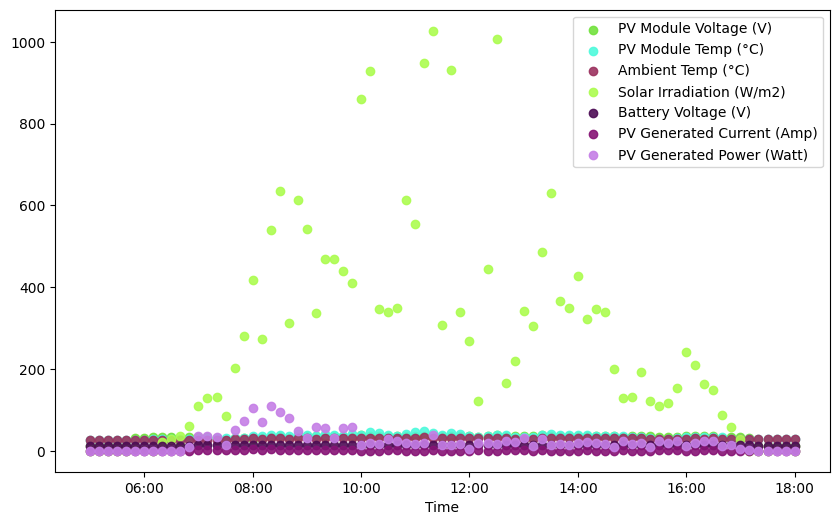

In [105]:
X=new_dataset[:,0]
y=new_dataset[:,2:]
plt.figure(figsize=(10, 6))

for i in range (7):
  colo=random_color()
  plt.scatter(X, y[:,i], marker='o', color=[colo],alpha=0.9)
# plt.ylabel("PV Generated Power (Watt)")
plt.xlabel("Time")
plt.legend(["PV Module Voltage (V)","PV Module Temp (°C)","Ambient Temp (°C)","Solar Irradiation (W/m2)","Battery Voltage (V)","PV Generated Current (Amp)","PV Generated Power (Watt)"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

In [92]:
import random

def random_color():
    """Generate a random color in RGB format."""
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return (r, g, b)

# Example usage
color = random_color()
for i in range(0,10):
  print("Random color:", random_color())


Random color: (82, 138, 78)
Random color: (3, 183, 136)
Random color: (237, 13, 158)
Random color: (211, 248, 202)
Random color: (213, 100, 49)
Random color: (168, 106, 87)
Random color: (46, 231, 194)
Random color: (173, 149, 21)
Random color: (107, 57, 101)
Random color: (190, 196, 25)
